In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy import sparse
import sys
from sklearn.utils import shuffle
import joblib
sys.path.append("../")
from helper_functions import *

In [2]:
x_train = sparse.load_npz("Data/xtrain.npz")
x_test = sparse.load_npz("Data/xtest.npz")
y_train = np.load("Data/ytrain.npy")
y_test = np.load("Data/ytest.npy")

In [4]:
x_train = x_train.toarray()
x_test = x_test.toarray()
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x = sparse.csr_matrix(x)

In [5]:
x_train = sparse.csr_matrix(x_train)
x_test = sparse.csr_matrix(x_test)

In [6]:
x,y = shuffle(x,y, random_state=1)

In [7]:
log_reg = LogisticRegression()
lgbm = LGBMClassifier()
gboost = GradientBoostingClassifier()
cat = CatBoostClassifier()

In [8]:
models = {
    'LogisticRegression': log_reg,
    'LGBMClassifier': lgbm,
    'GradientBoostingClassifier': gboost,
    'CatBoostClassifier': cat
}

In [7]:
BestParam_search(models, x, y, 2)

Starting Grid Search for Model: LogisticRegression


## The Result for Logistic Regression and LGBM classifier were as follows:
<font size ='5'>
Starting Grid Search for Model: LogisticRegression  <br>                            
Search Finished                                         <br>                            
Best hyperparameters:  {'C': 100, 'l1_ratio': 0.2, 'max_iter': 2000, 'penalty': 'elasticnet', 'solver': 'saga'}<br>         
Best score:  0.6722116939956837                             <br>                                           
------------------------ <br>                                        
Starting Grid Search for Model: LGBMClassifier<br>
Search Finished<br>
Best hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}<br>
Best score:  0.61531530223271<br>
------------------------<br>
</font>
<br>
Gradient Boosting and CatBoost were taking too long to figure out so they were dropped

In [4]:
log_reg = LogisticRegression(C=100, l1_ratio=0.2, penalty='elasticnet', solver='saga', max_iter=2000)
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.6749206349206349

In [3]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.6488888888888888

                 Model Performance
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       220
           1       0.68      0.69      0.68       105
           2       0.48      0.46      0.47       114
           3       0.60      0.45      0.51        69
           4       0.74      0.79      0.76       233
           5       0.78      0.68      0.72        93
           6       0.67      0.35      0.46        62
           7       0.71      0.72      0.72       185
           8       0.74      0.75      0.75       128
           9       0.45      0.52      0.48       193
          10       0.95      0.91      0.93       173

    accuracy                           0.67      1575
   macro avg       0.67      0.64      0.65      1575
weighted avg       0.68      0.67      0.67      1575

Accuracy = 67.49%


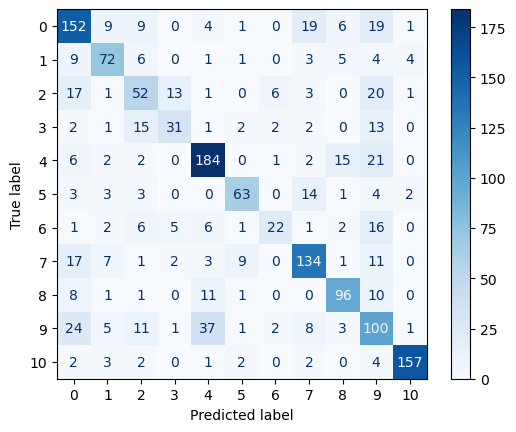

In [8]:
performance(log_reg, x_test, y_test)

In [6]:
log_comp = {
    "LogisticRegression(initial)": lr,
    "LogisticRegression(finetuned)": log_reg
}

compare_performance(log_comp, x_test, y_test)

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,LogisticRegression(initial),0.649,0.570,0.761,0.474,0.529,0.680,0.867,0.571,0.664,...,0.694,0.431,0.209,0.759,0.680,0.116,0.712,0.725,0.435,0.926
1,LogisticRegression(finetuned),0.675,0.631,0.679,0.481,0.596,0.739,0.778,0.667,0.713,...,0.682,0.468,0.512,0.763,0.724,0.463,0.718,0.747,0.482,0.926


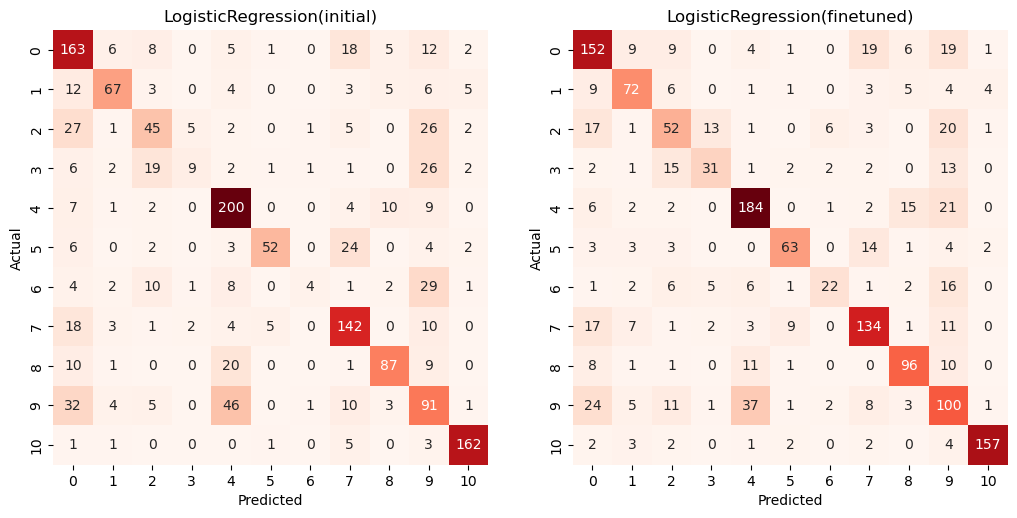

In [7]:
compare_heatmaps(log_comp, x_test, y_test)

In [9]:
joblib.dump(log_reg, 'Models/Fine-tuned/Logistic Regression.pk1')

['Models/Fine-tuned/Logistic Regression.pk1']